In [68]:
#get fMNIST dataset with keras datasets
import tensorflow as tf
from keras.datasets import fashion_mnist as fmnist

#load data
(x_train_image, y_train_labels), (x_test_image, y_test_labels) = fmnist.load_data()

#print the image and labels
print("shape of train images: ", x_train_image.shape)
print("shape of train labels: ", y_train_labels.shape)
print("shape of test images: ", y_test_labels[0])





shape of train images:  (60000, 28, 28)
shape of train labels:  (60000,)
shape of test images:  9


In [69]:
print(f'Image Dtype: {type(x_train_image.dtype)}')
print(f'Image Element Dtype: {type(x_train_image[0,0,0])}')
print(f'Label element Dtype: {type(y_train_labels[0])}')
print('shapes')
print(f'Image shape: {x_train_image.shape}')
print(f'Label shape: {y_train_labels.shape}')
print('test data')
print(f'Image shape: {x_test_image.shape}')
print(f'Label shape: {y_test_labels.shape}')
print('image data range')
print(f'Image min: {x_train_image.min()}')
print(f'Image max: {x_train_image.max()}')


Image Dtype: <class 'numpy.dtype[uint8]'>
Image Element Dtype: <class 'numpy.uint8'>
Label element Dtype: <class 'numpy.uint8'>
shapes
Image shape: (60000, 28, 28)
Label shape: (60000,)
test data
Image shape: (10000, 28, 28)
Label shape: (10000,)
image data range
Image min: 0
Image max: 255


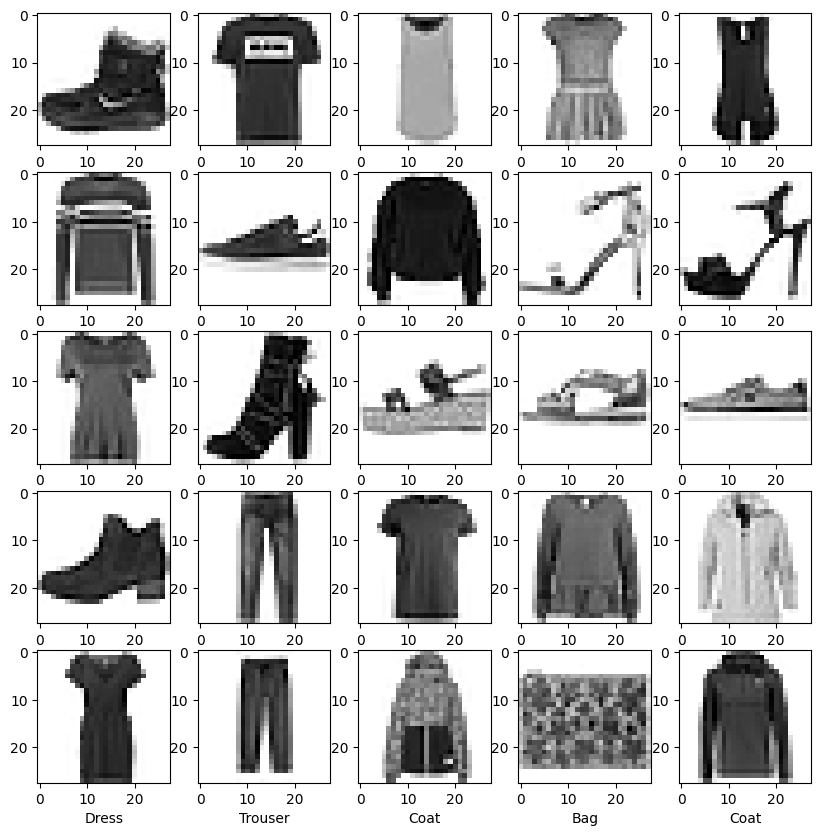

In [70]:
import matplotlib.pyplot as plt
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'hoodie',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'boot',
    8:'Bag',
    9:'Ankle boot'
}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
   
    plt.imshow(x_train_image[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[y_train_labels[i]])

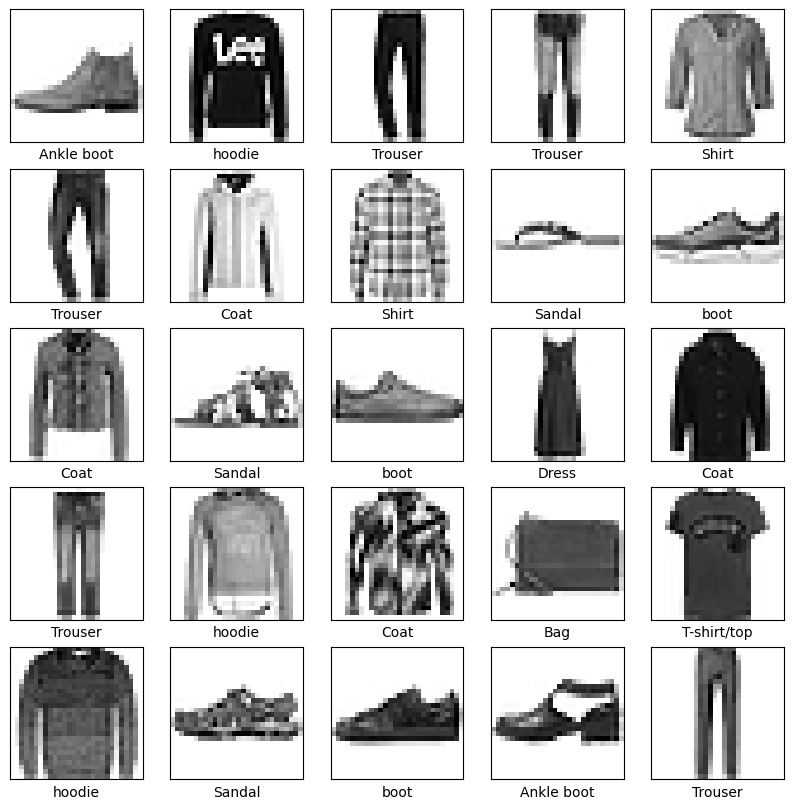

In [71]:
#test data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(x_test_image[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[y_test_labels[i]])

In [72]:
y_train_labels[0]

9

In [73]:
print("number of training data: ", len(x_train_image))
print("number of testing data: ", len(x_test_image))

number of training data:  60000
number of testing data:  10000


In [74]:
x_train_image = x_train_image.reshape((60000, 28*28))
x_test_image = x_test_image.reshape((10000, 28*28))
x_train_image = x_train_image.astype('float32')/255
x_test_image = x_test_image.astype('float32')/255

Training model

In [75]:
#train a dense neural network using keras seq
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils

model = Sequential([layers.Dense(512, activation='relu'),
                    layers.Dense(10, activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(x_train_image, y_train_labels, epochs=10, batch_size=32, verbose=1)


#evaluate the model
result=model.evaluate(x_test_image, y_test_labels)
print("test loss", result[0])
print("test accuracy", result[1])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4723 - accuracy: 0.8305
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3580 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3231 - accuracy: 0.8797
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3001 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2805 - accuracy: 0.8958
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2642 - accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2528 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2396 - accuracy: 0.9112
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2301 - accuracy: 0.9135
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

Predicting the model

In [76]:
import numpy as np
y_pred = model.predict(x_test_image)
y_pred = np.argmax(y_pred, axis=1)

y_true = y_test_labels

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)




313/313 [==============================] - 1s 2ms/step


confusion Matrix

In [77]:
print(cm)

[[901   0   7  37   8   1  39   0   7   0]
 [  3 978   0  13   3   0   2   0   1   0]
 [ 30   3 750  14 142   0  57   0   4   0]
 [ 18   6   8 906  43   0  15   0   4   0]
 [  1   0  59  17 892   0  30   0   1   0]
 [  0   0   0   0   0 963   0  24   0  13]
 [174   0  56  46 108   0 606   0  10   0]
 [  0   0   0   0   0  15   0 966   0  19]
 [  8   0   0   7   6   7   1   4 967   0]
 [  1   0   0   0   0  10   0  36   0 953]]


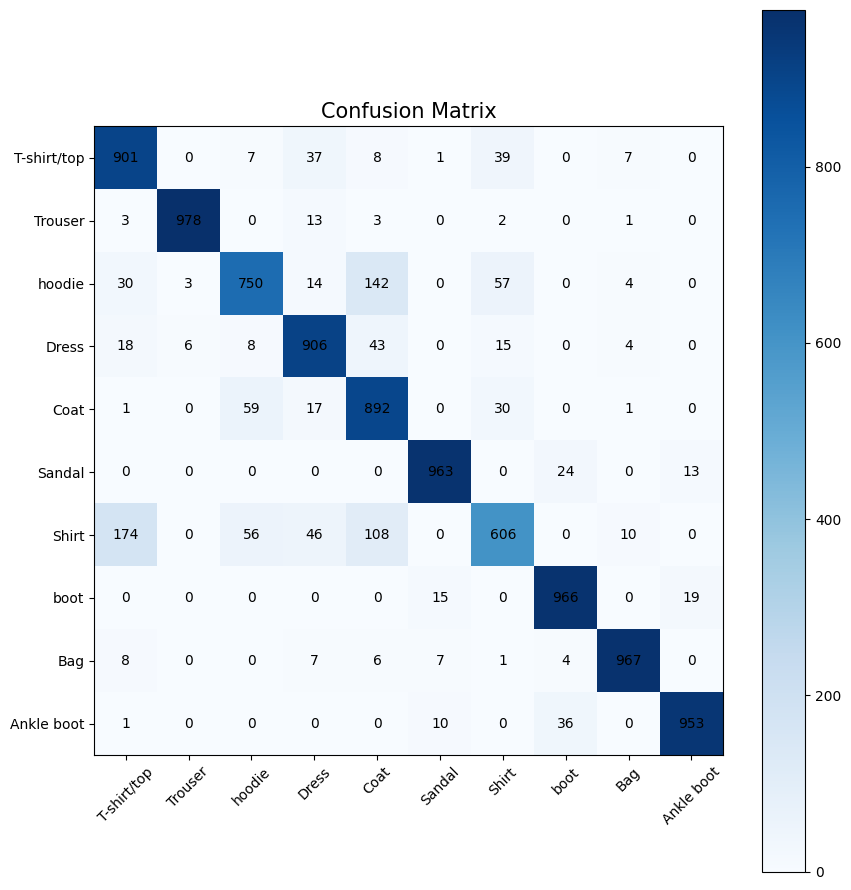

In [78]:
#Plot the confusion matrix using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["T-shirt/top", "Trouser", "hoodie", "Dress", "Coat", "Sandal", "Shirt", "boot", "Bag", "Ankle boot"], rotation=45, size = 10)
plt.yticks(tick_marks, ["T-shirt/top", "Trouser", "hoodie", "Dress", "Coat", "Sandal", "Shirt", "boot", "Bag", "Ankle boot"], size = 10)
plt.tight_layout()
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')




From the above confusion matrix we can say that where diagonal values(901,978,750 and so on) are for true positive saying how many correct values are there for each label and off diagonal values are miss calculation
accuracy from the confusion matrix 


Number of incorrect Predictions


number of incorrect predictions:  1118


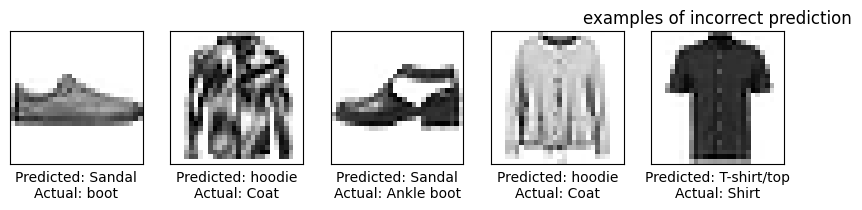

In [90]:
#find number of incorrect predictions
incorrects = np.nonzero(y_pred != y_true)[0]
print("number of incorrect predictions: ", len(incorrects))

#plot the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrects[:5]):
   
    plt.subplot(5,5,i+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_image[incorrect].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted: " + labels[y_pred[incorrect]] + "\nActual: " + labels[y_true[incorrect]])
plt.title("examples of incorrect prediction")
plt.show()

